<h1 align=center><font size = 5>Data Science amb Python</font></h1>



## Sprint 17 
#### S17 T02: Base de dades MySQL


#### Cristiane de Souza da Silva

Juny 2021

## Description

**Create database with MySQL.**

### Nivel 1

#### - Exercises 1
Create a simple relational database using MySQL (https://www.mysql.com/) and connect it to Python

In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector


mydb = mysql.connector.connect(host="localhost",
                               user="root",
                               password="password",
                              database="employees_database")

print(mydb)

The database "employees_database" was created in mysql workbench and it was connected to the pyhton.

Now I'll create a table 'employees' and input some values on it.

In [3]:
mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE employees(emp_id CHAR(9),f_name VARCHAR(15),l_name VARCHAR(15),b_date DATE ,salary DECIMAL(6,2),dep_id CHAR(9))")

In [5]:
sql = "INSERT INTO employees (emp_id, f_name, l_name, b_date, salary, dep_id) VALUES (%s, %s, %s, %s, %s, %s)"
val = [('EMP645789', 'Maria', 'Silva', '1975-08-04', 1860.90, 'FIN000567'),
          ('EMP235789', 'Ana', 'Castillo', '1984-07-09',  1960.70, 'TEC000987'),
          ('EMP235112', 'Jose', 'Borit','1982-12-14', 1760.70, 'TEC000987'),
          ('EMP895134', 'Idalina', 'Tamas','1989-11-25', 1760.70, 'ADM000524'),
          ('EMP895135', 'Jaume', 'Martínez','1987-06-25',  1560.70, 'ADM000524'), 
          ('EMP895185', 'Cynthia', 'Measor','1990-01-09', 1560.70, 'TEC000987'),
          ('EMP895131', 'Alonso', 'Mugg','1965-07-09', 1960.70, 'TEC000987'),
          ('EMP895101', 'Judy', 'Ribey','1983-02-09',  1760.70, 'TEC000987')
         ]

mycursor.executemany(sql, val)

mydb.commit()



### Nivel 2

#### - Exercises 2

Show that you can upload some simple queries to a Pandas Dataframe.

In [6]:
# import the library pandas
import pandas as pd

In [7]:
# create a dataframe with the function read_sql from pandas
'''
Create a daframe with all values.
'''

df = pd.read_sql("""
SELECT *
FROM employees""", 
con = mydb)

df


,emp_id,f_name,l_name,b_date,salary,dep_id
0,EMP645789,Maria,Silva,1975-08-04,1860.9,FIN000567
1,EMP235789,Ana,Castillo,1984-07-09,1960.7,TEC000987
2,EMP235112,Jose,Borit,1982-12-14,1760.7,TEC000987
3,EMP895134,Idalina,Tamas,1989-11-25,1760.7,ADM000524
4,EMP895135,Jaume,Martínez,1987-06-25,1560.7,ADM000524
5,EMP895185,Cynthia,Measor,1990-01-09,1560.7,TEC000987
6,EMP895131,Alonso,Mugg,1965-07-09,1960.7,TEC000987
7,EMP895101,Judy,Ribey,1983-02-09,1760.7,TEC000987


In [8]:
'''
Create a daframe with salaries bigger than 1600
in  ascending order by employees' name.
'''

df_salary = pd.read_sql("""
SELECT f_name, salary
FROM employees
WHERE salary > 1600
ORDER BY f_name""", con = mydb)

df_salary

,f_name,salary
0,Alonso,1960.7
1,Ana,1960.7
2,Idalina,1760.7
3,Jose,1760.7
4,Judy,1760.7
5,Maria,1860.9


In [9]:
'''
Create a daframe with people borned
before 1980.
'''

df_date = pd.read_sql("""
SELECT f_name, b_date
FROM employees
WHERE b_date < '1980-01-01'""", 
                      con = mydb)

df_date

,f_name,b_date
0,Maria,1975-08-04
1,Alonso,1965-07-09


### Nivel 3

#### - Exercise 3

Generate a graph that summarizes the data.



In [10]:
# import library seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# evaluate the average salary by departament

salary_avg = pd.DataFrame(df.groupby('dep_id')['salary'].mean()).reset_index()
salary_avg


,dep_id,salary
0,ADM000524,1660.7
1,FIN000567,1860.9
2,TEC000987,1800.7


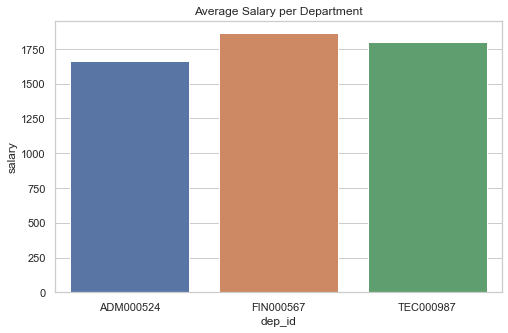

In [26]:
plt.figure(figsize=(8,5))

sns.set_theme(style="whitegrid")
sns.barplot(x = 'dep_id', y = 'salary', data =salary_avg )
plt.title('Average Salary per Department');


We can see that the FIN000567 department ( finances) is the one which has the biggest average salary, followed by the TEC000987 ( technology) and ADM000524 ( administration).

Let's see how is the correlation between salary and age.

In [12]:
#copy the df dataframe
df_new = df.copy()

# see its information

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   emp_id  8 non-null      object 
 1   f_name  8 non-null      object 
 2   l_name  8 non-null      object 
 3   b_date  8 non-null      object 
 4   salary  8 non-null      float64
 5   dep_id  8 non-null      object 
dtypes: float64(1), object(5)
memory usage: 512.0+ bytes


In [13]:
#convert date to datetime

df_new['b_date'] = pd.to_datetime(df['b_date'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   emp_id  8 non-null      object        
 1   f_name  8 non-null      object        
 2   l_name  8 non-null      object        
 3   b_date  8 non-null      datetime64[ns]
 4   salary  8 non-null      float64       
 5   dep_id  8 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 512.0+ bytes


In [14]:
df_new

,emp_id,f_name,l_name,b_date,salary,dep_id
0,EMP645789,Maria,Silva,1975-08-04,1860.9,FIN000567
1,EMP235789,Ana,Castillo,1984-07-09,1960.7,TEC000987
2,EMP235112,Jose,Borit,1982-12-14,1760.7,TEC000987
3,EMP895134,Idalina,Tamas,1989-11-25,1760.7,ADM000524
4,EMP895135,Jaume,Martínez,1987-06-25,1560.7,ADM000524
5,EMP895185,Cynthia,Measor,1990-01-09,1560.7,TEC000987
6,EMP895131,Alonso,Mugg,1965-07-09,1960.7,TEC000987
7,EMP895101,Judy,Ribey,1983-02-09,1760.7,TEC000987


In [16]:
#Create a age column
import datetime

def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


df_new['age'] = df_new['b_date'].apply(lambda x: from_dob_to_age(x))


In [17]:
df_new

,emp_id,f_name,l_name,b_date,salary,dep_id,age
0,EMP645789,Maria,Silva,1975-08-04,1860.9,FIN000567,45
1,EMP235789,Ana,Castillo,1984-07-09,1960.7,TEC000987,36
2,EMP235112,Jose,Borit,1982-12-14,1760.7,TEC000987,38
3,EMP895134,Idalina,Tamas,1989-11-25,1760.7,ADM000524,31
4,EMP895135,Jaume,Martínez,1987-06-25,1560.7,ADM000524,34
5,EMP895185,Cynthia,Measor,1990-01-09,1560.7,TEC000987,31
6,EMP895131,Alonso,Mugg,1965-07-09,1960.7,TEC000987,55
7,EMP895101,Judy,Ribey,1983-02-09,1760.7,TEC000987,38


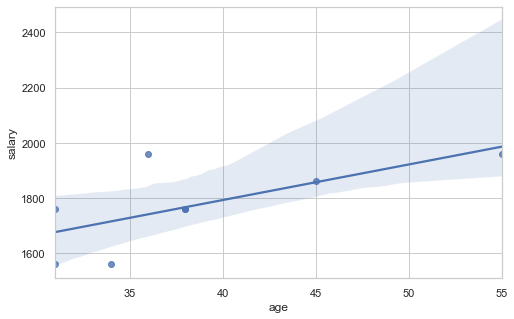

In [25]:
plt.figure(figsize=(8,5))
sns.regplot(x="age", y="salary", data=df_new);

In [19]:
df_new.corr()

,salary,age
salary,1.000000,0.668432
age,0.668432,1.000000


The graph shows that there is a positive correlation between age and salary, that is, salary grows with age. However the correlation is not very high as shown by the correlation coefficient, 0.67. This means that, in this case, the biggest salary does not always belong to the eldest.

In [21]:
# evaluate the average age by departament

age_avg = pd.DataFrame(df_new.groupby('dep_id')['age'].mean()).reset_index()
age_avg

,dep_id,age
0,ADM000524,32.5
1,FIN000567,45.0
2,TEC000987,39.6


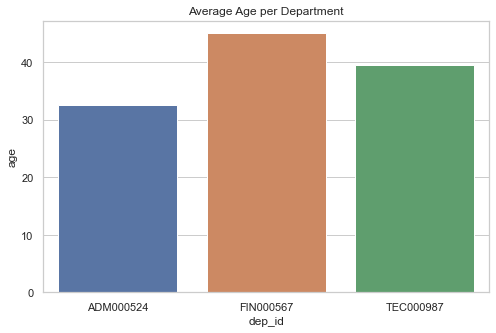

In [27]:
plt.figure(figsize=(8,5))

sns.set_theme(style="whitegrid")
sns.barplot(x = 'dep_id', y = 'age', data =age_avg )
plt.title('Average Age per Department');

The graph above shows that the Finance department has the biggest average age among the three departemnts , 45.

however, more people would be needed in this department as there is only one.